### Part I. Data preparation

#### 1.1 import necessary libraries and dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
pd.set_option('display.float_format',lambda x : '%.4f' % x) # round to 0.0001

In [2]:
# import dataset
df = pd.read_excel("D:\\Master1grade\\Econometrics\\model3\\data_21\\data_21.xls")
our_data = df.copy()
our_data # original dataset contains 152 rows × 13 columns

,id,rating_19,rating_abc_19,bank_name,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17
0,105785,ruA-,A,Best Efforts Bank,Moscow and Moscow region,3900168,5471572,1544236,1777847,83249,79562,13732,66126
1,104697,ruBBB,B,Assotsiatsiya,Nizhegorodskaya region,14049798,11916190,1477085,1345238,138590,106648,8166095,5626379
2,104280,ruCCC,C,Mezhregional'nyj promyshlenno-stroitel'nyj bank,Mordoviya,3664229,4046699,502546,523506,-104759,-59780,2383673,2288102
3,103413,ruA-,A,Bank Zenit,Moscow and Moscow region,237280953,241550607,36678023,41410948,500183,-1599399,135691097,146813840
4,1000013430,ruAA,A,Al'fa-Bank,Moscow and Moscow region,3243100096,2699694089,431574349,327404269,89770198,37694739,2047814019,1627777000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1000019588,ruB,B,Kremlevskij,Moscow and Moscow region,3816927,4099346,2073082,1471908,126186,67685,2311223,2356944
148,105322,ruBBB+,B,BKS Bank,Moscow and Moscow region,60263798,59909901,6523816,6274909,298136,304725,3477198,2887815
149,105645,ruB+,B,Moskva-Siti,Moscow and Moscow region,5072155,4361618,1288679,1247949,9283,102322,1357226,1265001
150,176100,ruA-,A,RNKB,Simferopol',156200909,114300945,44090835,37786715,2592046,1878700,121069052,63448780


#### 1.2 missing values

In [3]:
# check for missing values, no np.Nan at all
our_data.isna().sum()

id                     0
rating_19              0
rating_abc_19          0
bank_name              0
region                 0
assets_18              0
assets_17              0
bank_capital_18        0
bank_capital_17        0
net_income_18          0
net_income_17          0
credit_portfolio_18    0
credit_portfolio_17    0
dtype: int64

#### 1.3 reshape original dataframe

1.3.1 id

In [4]:
# drop column "id" since it's unrealastic to consider id in rating
our_data = our_data.drop(["id"], axis=1)
our_data.head()

,rating_19,rating_abc_19,bank_name,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17
0,ruA-,A,Best Efforts Bank,Moscow and Moscow region,3900168,5471572,1544236,1777847,83249,79562,13732,66126
1,ruBBB,B,Assotsiatsiya,Nizhegorodskaya region,14049798,11916190,1477085,1345238,138590,106648,8166095,5626379
2,ruCCC,C,Mezhregional'nyj promyshlenno-stroitel'nyj bank,Mordoviya,3664229,4046699,502546,523506,-104759,-59780,2383673,2288102
3,ruA-,A,Bank Zenit,Moscow and Moscow region,237280953,241550607,36678023,41410948,500183,-1599399,135691097,146813840
4,ruAA,A,Al'fa-Bank,Moscow and Moscow region,3243100096,2699694089,431574349,327404269,89770198,37694739,2047814019,1627777000


1.3.2 form of numeric colunms (r.g. assets_18, bank_capital_17)

Since Assets, Bank Capital, Credit Portfolio and Net Income are among the key indicators for assigning the score of ranking, its wise to treat all 8 variables related above as explanatory variables.

In [5]:
# then check whether numeric colunms are all int/floats (transform the potentional form like str)
our_data.describe()

,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,283809128.2961,232072556.2500,34968793.4013,27357074.4934,3044668.4408,1719948.9868,166451960.8882,127902165.7829
std,1280291745.0368,942140738.7145,144340668.3588,110688886.0227,18266719.6051,14232849.4820,854013918.2285,550108915.0007
min,1035022.0000,1023476.0000,341441.0000,-209484321.0000,-10655447.0000,-116492229.0000,13732.0000,23465.0000
25%,6754503.2500,6501142.2500,1334967.0000,1274860.7500,22620.2500,18625.2500,2400122.7500,2514507.2500
50%,18975521.5000,17356778.5000,3205251.0000,2884556.0000,133852.5000,135508.5000,7623835.0000,6972987.0000
75%,63042599.5000,58177416.7500,10388556.0000,9108068.7500,771939.2500,841961.0000,28689933.7500,27687935.0000
max,13832231418.0000,9353664727.0000,1510439357.0000,1050663814.0000,202585461.0000,90118313.0000,9361043441.0000,5220939977.0000


1.3.3 rating_19 and rating_abc_19

In [6]:
# remove first two characters "ru" in rating_19 for potential usage (may be in part 3 as a criteria of numeric Ranking in ordered response model)
our_data["rating_19"] = our_data["rating_19"].map(lambda x: str(x)[2:])
our_data.head()

,rating_19,rating_abc_19,bank_name,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17
0,A-,A,Best Efforts Bank,Moscow and Moscow region,3900168,5471572,1544236,1777847,83249,79562,13732,66126
1,BBB,B,Assotsiatsiya,Nizhegorodskaya region,14049798,11916190,1477085,1345238,138590,106648,8166095,5626379
2,CCC,C,Mezhregional'nyj promyshlenno-stroitel'nyj bank,Mordoviya,3664229,4046699,502546,523506,-104759,-59780,2383673,2288102
3,A-,A,Bank Zenit,Moscow and Moscow region,237280953,241550607,36678023,41410948,500183,-1599399,135691097,146813840
4,AA,A,Al'fa-Bank,Moscow and Moscow region,3243100096,2699694089,431574349,327404269,89770198,37694739,2047814019,1627777000


In [7]:
# rating_19 and rating_abc_19 should not be included in explanatory variables 
# since rating_abc_19 is directly for ranking, which is the dependent variable 
# and rating_19 is nothing but another rating form

# rating_abc_19 a subset of rating_19
sum(our_data["rating_19"].map(lambda x: str(x)[0]) == our_data["rating_abc_19"]) == len(our_data)

True

1.3.4 bank name

In [8]:
# check whether bank_name is unique
our_data["bank_name"].value_counts() # so each row refers to one sepcific bank

Sovkombank                        1
NBD-Bank                          1
Bank Zenit                        1
Prio-Vneshtorgbank                1
YUniKredit Bank                   1
                                 ..
VTB                               1
Aresbank                          1
Energomashbank                    1
MBA-Moskva                        1
Metkombank (Kamensk-Ural'skij)    1
Name: bank_name, Length: 152, dtype: int64

In [9]:
# then is also pointless analysising for a sepcific bank name on rating giving such dataset
our_data = our_data.drop(["bank_name"], axis=1)

1.3.5 region

In [10]:
# check different region countings
our_data["region"].value_counts() # the majority in Moscow and Moscow region

Moscow and Moscow region                      76
Saint Petersburg and Leningradskaya region    12
CHelyabinskaya region                          5
Sverdlovskaya region                           5
Primorskij kraj                                4
Tatarstan                                      4
Novosibirskaya region                          3
Samarskaya region                              3
Orenburgskaya region                           3
Mordoviya                                      3
Nizhegorodskaya region                         3
Kirovskaya region                              2
Udmurtiya                                      2
Altajskij kraj                                 2
Tyumenskaya region                             2
Krasnodarskij kraj                             2
Irkutskaya region                              1
KHanty-Mansijskij AO — YUgra                   1
Stavropol'skij kraj                            1
Komi                                           1
Simferopol'         

In [11]:
# create a binary variable that takes value 1 if region is in Moscow and Moscow region and 0 otherwise
our_data["region"] = our_data["region"].apply(lambda x: 1 if x == "Moscow and Moscow region" else 0)
our_data["region"].value_counts()

1    76
0    76
Name: region, dtype: int64

1.3.6 assign ranking

In [12]:
# firstly work on rating_abc_19
our_data["rating_abc_19"].value_counts()

B    113
A     35
C      4
Name: rating_abc_19, dtype: int64

In [13]:
# Use the variable Ranking to generate a binary variable which is equal to 1, if the bank is ranked with A and higher, 
# and equals 0, if the bank has a lower ranking value.
our_data["ranking"] = our_data["rating_abc_19"].apply(lambda x: 1 if x == "A" else 0)

# modified from here for ordered response model 
# our_data["ranking"] = our_data["rating_19"].apply(lambda x: some_criteria)

our_data["ranking"].value_counts()

0    117
1     35
Name: ranking, dtype: int64

In [14]:
# then for rating_19, the worst rate is CCC
our_data["rating_19"].value_counts()

B       18
B-      18
BB+     17
B+      15
BB-     13
A-      13
BBB-     9
BBB      9
A        8
BB       8
BBB+     6
AA       5
CCC      4
A+       4
AAA      4
AA+      1
Name: rating_19, dtype: int64

In [15]:
# define ordered variable as follows, please check 1.7 for more datail
order0 = ["B", "B-", "B+", "CCC", "CCC-","CCC+"]
order1 = ["BB", "BB-", "BB+"]
order2 = ["AAA", "AA", "AA-", "AA+", "A", "A-", "A+", "BBB", "BBB-", "BBB+"]

dict0 = dict(zip(order0, [0 for i in order0]))
dict1 = dict(zip(order1, [1 for i in order1]))
dict2 = dict(zip(order2, [2 for i in order2]))
dict_all = {**dict0, **dict1, **dict2} # get the map rule

In [16]:
# rating_19 after transfering
our_data["ranking_multi"] = our_data["rating_19"].map(dict_all)
our_data["ranking_multi"].value_counts()

2    59
0    55
1    38
Name: ranking_multi, dtype: int64

In [17]:
our_data_new = our_data.copy()

In [18]:
# get the columns we're interested in for binary choice model,
# ordered response model may be assigned ranking values via rating_19 for more detailed info
our_data_new = our_data_new.drop(["rating_abc_19", "rating_19"], axis=1)
our_data_new

,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17,ranking,ranking_multi
0,1,3900168,5471572,1544236,1777847,83249,79562,13732,66126,1,2
1,0,14049798,11916190,1477085,1345238,138590,106648,8166095,5626379,0,2
2,0,3664229,4046699,502546,523506,-104759,-59780,2383673,2288102,0,0
3,1,237280953,241550607,36678023,41410948,500183,-1599399,135691097,146813840,1,2
4,1,3243100096,2699694089,431574349,327404269,89770198,37694739,2047814019,1627777000,1,2
...,...,...,...,...,...,...,...,...,...,...,...
147,1,3816927,4099346,2073082,1471908,126186,67685,2311223,2356944,0,0
148,1,60263798,59909901,6523816,6274909,298136,304725,3477198,2887815,0,2
149,1,5072155,4361618,1288679,1247949,9283,102322,1357226,1265001,0,0
150,0,156200909,114300945,44090835,37786715,2592046,1878700,121069052,63448780,1,2


Suggest which explanatory variables influence the rank of a bank:

* Assets: assets_18, assets_17;
* Bank Capital: bank_capital_18, bank_capital_17;
* Credit Portfolio: credit_portfolio_18, credit_portfolio_17;
* Net Income: net_income_18, net_income_17;
* Region: region (1 if Moscow and Moscow region; and 0 otherwise).

#### 1.4 abnormal values

In [19]:
# statistic analysis, consider the big numbers it's hard to detect all the outliers
# however, it still indicates some extreme large values in nerely all x's
our_data_new.describe()

,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17,ranking,ranking_multi
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,0.5000,283809128.2961,232072556.2500,34968793.4013,27357074.4934,3044668.4408,1719948.9868,166451960.8882,127902165.7829,0.2303,1.0263
std,0.5017,1280291745.0368,942140738.7145,144340668.3588,110688886.0227,18266719.6051,14232849.4820,854013918.2285,550108915.0007,0.4224,0.8685
min,0.0000,1035022.0000,1023476.0000,341441.0000,-209484321.0000,-10655447.0000,-116492229.0000,13732.0000,23465.0000,0.0000,0.0000
25%,0.0000,6754503.2500,6501142.2500,1334967.0000,1274860.7500,22620.2500,18625.2500,2400122.7500,2514507.2500,0.0000,0.0000
50%,0.5000,18975521.5000,17356778.5000,3205251.0000,2884556.0000,133852.5000,135508.5000,7623835.0000,6972987.0000,0.0000,1.0000
75%,1.0000,63042599.5000,58177416.7500,10388556.0000,9108068.7500,771939.2500,841961.0000,28689933.7500,27687935.0000,0.0000,2.0000
max,1.0000,13832231418.0000,9353664727.0000,1510439357.0000,1050663814.0000,202585461.0000,90118313.0000,9361043441.0000,5220939977.0000,1.0000,2.0000


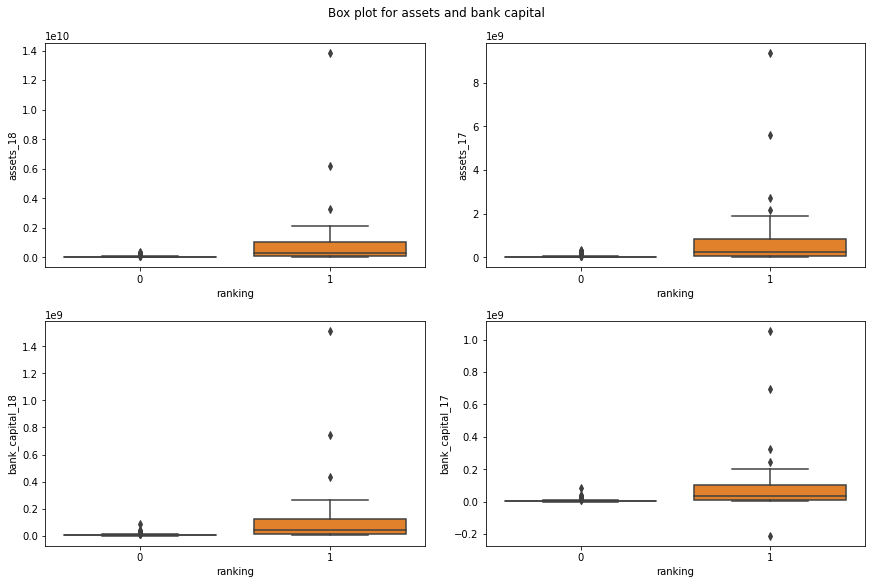

In [20]:
# try visualize via box plot, there should be some outliers
fig, ax =plt.subplots(2, 2, constrained_layout=True, figsize=(12, 8))

axsub = sns.boxplot(data=our_data_new, x="ranking", y="assets_18", ax=ax[0][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="assets_17", ax=ax[0][1])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="bank_capital_18", ax=ax[1][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="bank_capital_17", ax=ax[1][1])

fig.suptitle('Box plot for assets and bank capital')
plt.show()

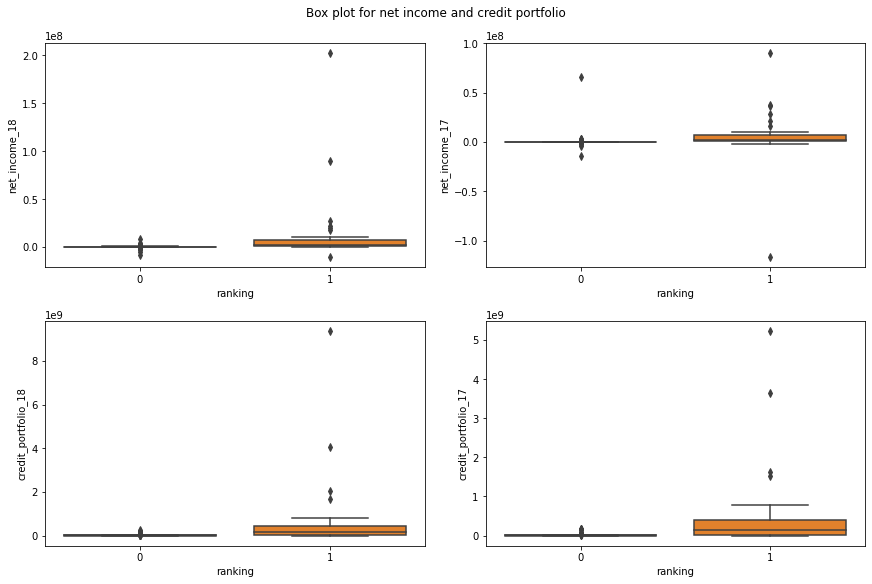

In [21]:
fig, ax =plt.subplots(2, 2, constrained_layout=True, figsize=(12, 8))

axsub = sns.boxplot(data=our_data_new, x="ranking", y="net_income_18", ax=ax[0][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="net_income_17", ax=ax[0][1])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="credit_portfolio_18", ax=ax[1][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="credit_portfolio_17", ax=ax[1][1])

fig.suptitle('Box plot for net income and credit portfolio')
plt.show()

In [22]:
# detect and drop outlier via Z-score, assume normal distribution of x's
# since there're only 152 rows with 9 x's, we should drop outlier conservatively
our_data_new = our_data_new[our_data_new.apply(lambda x: abs(zscore(x)) < 3)]
our_data_new = our_data_new.dropna().reset_index(drop=True)
our_data_new

,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17,ranking,ranking_multi
0,1,3900168.0000,5471572.0000,1544236.0000,1777847.0000,83249.0000,79562.0000,13732.0000,66126.0000,1,2
1,0,14049798.0000,11916190.0000,1477085.0000,1345238.0000,138590.0000,106648.0000,8166095.0000,5626379.0000,0,2
2,0,3664229.0000,4046699.0000,502546.0000,523506.0000,-104759.0000,-59780.0000,2383673.0000,2288102.0000,0,0
3,1,237280953.0000,241550607.0000,36678023.0000,41410948.0000,500183.0000,-1599399.0000,135691097.0000,146813840.0000,1,2
4,0,4481228.0000,4440604.0000,1277197.0000,1263750.0000,94736.0000,85527.0000,2741430.0000,2933740.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
142,1,3816927.0000,4099346.0000,2073082.0000,1471908.0000,126186.0000,67685.0000,2311223.0000,2356944.0000,0,0
143,1,60263798.0000,59909901.0000,6523816.0000,6274909.0000,298136.0000,304725.0000,3477198.0000,2887815.0000,0,2
144,1,5072155.0000,4361618.0000,1288679.0000,1247949.0000,9283.0000,102322.0000,1357226.0000,1265001.0000,0,0
145,0,156200909.0000,114300945.0000,44090835.0000,37786715.0000,2592046.0000,1878700.0000,121069052.0000,63448780.0000,1,2


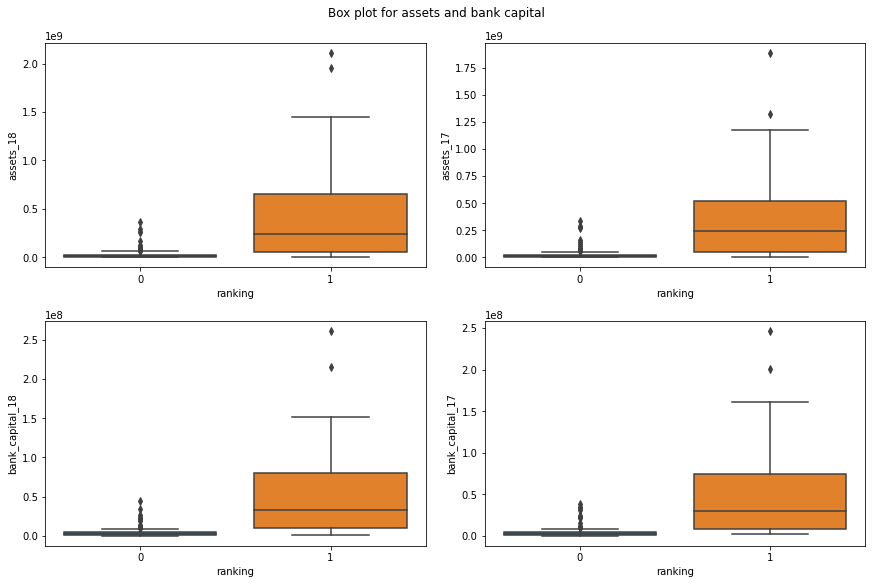

In [23]:
# after dealing with outliers, the box plot seems better
fig, ax =plt.subplots(2, 2, constrained_layout=True, figsize=(12, 8))

axsub = sns.boxplot(data=our_data_new, x="ranking", y="assets_18", ax=ax[0][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="assets_17", ax=ax[0][1])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="bank_capital_18", ax=ax[1][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="bank_capital_17", ax=ax[1][1])

fig.suptitle('Box plot for assets and bank capital')
plt.show()

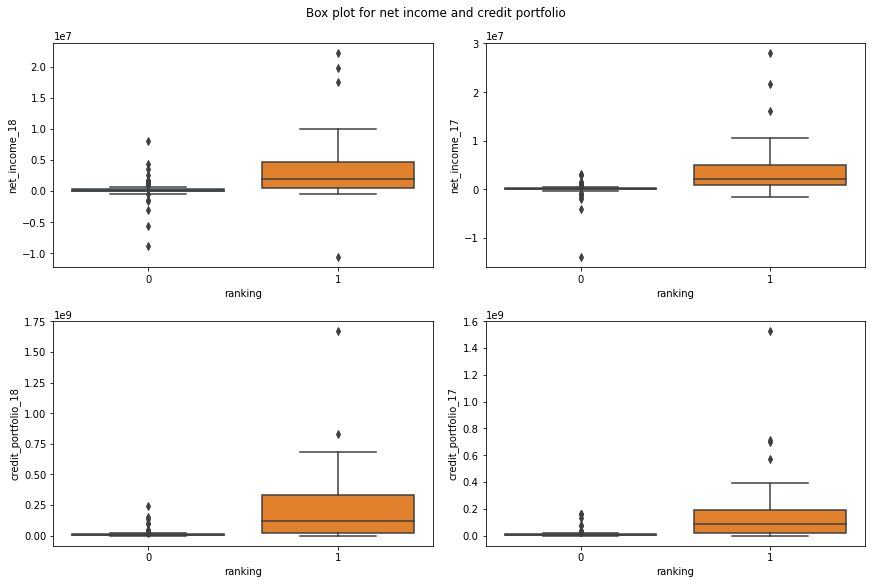

In [24]:
fig, ax =plt.subplots(2, 2, constrained_layout=True, figsize=(12, 8))

axsub = sns.boxplot(data=our_data_new, x="ranking", y="net_income_18", ax=ax[0][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="net_income_17", ax=ax[0][1])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="credit_portfolio_18", ax=ax[1][0])
axsub = sns.boxplot(data=our_data_new, x="ranking", y="credit_portfolio_17", ax=ax[1][1])

fig.suptitle('Box plot for net income and credit portfolio')
plt.show()

#### 1.5 statistical analysis

In [25]:
# take a brief view of what we've got so far
our_data_new

,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17,ranking,ranking_multi
0,1,3900168.0000,5471572.0000,1544236.0000,1777847.0000,83249.0000,79562.0000,13732.0000,66126.0000,1,2
1,0,14049798.0000,11916190.0000,1477085.0000,1345238.0000,138590.0000,106648.0000,8166095.0000,5626379.0000,0,2
2,0,3664229.0000,4046699.0000,502546.0000,523506.0000,-104759.0000,-59780.0000,2383673.0000,2288102.0000,0,0
3,1,237280953.0000,241550607.0000,36678023.0000,41410948.0000,500183.0000,-1599399.0000,135691097.0000,146813840.0000,1,2
4,0,4481228.0000,4440604.0000,1277197.0000,1263750.0000,94736.0000,85527.0000,2741430.0000,2933740.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
142,1,3816927.0000,4099346.0000,2073082.0000,1471908.0000,126186.0000,67685.0000,2311223.0000,2356944.0000,0,0
143,1,60263798.0000,59909901.0000,6523816.0000,6274909.0000,298136.0000,304725.0000,3477198.0000,2887815.0000,0,2
144,1,5072155.0000,4361618.0000,1288679.0000,1247949.0000,9283.0000,102322.0000,1357226.0000,1265001.0000,0,0
145,0,156200909.0000,114300945.0000,44090835.0000,37786715.0000,2592046.0000,1878700.0000,121069052.0000,63448780.0000,1,2


In [26]:
our_data_new.describe()

,region,assets_18,assets_17,bank_capital_18,bank_capital_17,net_income_18,net_income_17,credit_portfolio_18,credit_portfolio_17,ranking,ranking_multi
count,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000,147.0000
mean,0.4898,121803342.9864,103494389.4082,15553948.9932,15017828.4694,947793.5170,1004475.8571,61139761.7211,54479255.6531,0.2109,1.0000
std,0.5016,316910385.1724,256894834.4244,36999877.4748,35419459.4741,3540146.6192,3770933.4391,183938665.8851,165655480.0690,0.4093,0.8680
min,0.0000,1035022.0000,1023476.0000,341441.0000,340524.0000,-10655447.0000,-13968296.0000,13732.0000,23465.0000,0.0000,0.0000
25%,0.0000,6483932.5000,6409806.0000,1307915.0000,1273125.5000,21961.0000,17350.5000,2347448.0000,2366379.5000,0.0000,0.0000
50%,0.0000,17885752.0000,15928993.0000,3067309.0000,2827052.0000,126694.0000,129427.0000,7272969.0000,6385878.0000,0.0000,1.0000
75%,1.0000,58514020.0000,52702503.5000,8293827.0000,7807349.5000,682146.0000,781271.5000,23234299.0000,23759295.5000,0.0000,2.0000
max,1.0000,2110022181.0000,1884617801.0000,260713491.0000,246001301.0000,22236908.0000,28041971.0000,1668485338.0000,1524378780.0000,1.0000,2.0000


#### 1.6 part 1, 4.
* State hypotheses on influence of assets, bank capital, net income, and their dynamics on the position of a bank in the ranking

* assume numeric variables follows normal distribution;
* ...

#### 1.7 export .csv file

In [27]:
# csv file for part 2
our_data_new[["region", "assets_18", "assets_17", "bank_capital_18", "bank_capital_17", "net_income_18", "net_income_17", "credit_portfolio_18", "credit_portfolio_17", "ranking"]].to_csv("preprocessed_data_part2.csv", index=False)

In [28]:
# csv file for part 3
our_data_new[["region", "assets_18", "assets_17", "bank_capital_18", "bank_capital_17", "net_income_18", "net_income_17", "credit_portfolio_18", "credit_portfolio_17", "ranking_multi"]].to_csv("preprocessed_data_part3.csv", index=False)

data description
* **ranking**: Discrete variable for part 2, taking the value 0 if the bank has a lower rating value under A; and 1 if the bank is ranked with A and higher.

* **ranking_multi**: Discrete variable for part 3,\
taking the value 0, if the bank has rating B, CCC, CC, C, D (include +-) in S\&P. Speculative grade, more vulnerable, hard to meet financial commitments in the future;\
taking the value 1, speculative grade if the bank has rating BB (include +-) in S\&P. Speculative grade, less vulnerable but but faces major ongoing uncertainties to adverse business, financial and economic conditions;\ 
taking the value 2, if the bank has rating AAA, AA, A, BBB (include +-) in S\&P. Investment grade, strong or adequate capacity to meet financial commitments.

    * **region**: Discrete variable,taking the value 0 if is not in Moscow and Moscow region; and 1 if in Moscow and Moscow region;
    * **assets_18**: Asset 18 in conventional units;
    * **assets_17**: Asset 17 in conventional units;
    * **bank_capital_18**: Bank capital 18 in conventional units;
    * **bank_capital_17**: Bank capital 17 in conventional units;
    * **net_income_17**: Net income 18 in conventional units;
    * **net_income_18**: Net income 17 in conventional units;
    * **credit_portfolio_18**: Credit portfolio 18 in conventional units;
    * **credit_portfolio_17**: Credit portfolio 17 in conventional units.

#### from here we switch to R for further analysis